In [1]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import for text analytics
import spacy
from spacy import displacy
import string
from collections import Counter


# Import for text analytics
import spacy
from spacy import displacy
import string

# Load English language model of spacy
sp = spacy.load('en_core_web_sm')

# Final Project Machine Learning (MGT-502) - Corporate Greenwashing

Contributors:

*   Noé Lopez
*   Guillaume Rico
*   Charlotte Ahrens









# Prelimanary Analysis

## Import data set

In [2]:
# Import training dataset
url_train = "https://huggingface.co/datasets/climatebert/environmental_claims/raw/main/data/train.jsonl"
df_train = pd.read_json(url_train, lines=True)
#df_train

# Import testing dataset
url_test = "https://huggingface.co/datasets/climatebert/environmental_claims/raw/main/data/test.jsonl"
df_test = pd.read_json(url_test, lines=True)
#df_test

## Dataset Discovery

In [3]:
import spacy
import unidecode
sp = spacy.load("en_core_web_sm")

In [4]:
display(df_train)

,text,label
0,It will enable E.ON to acquire and leverage a ...,0
1,And that's honestly most markets in the U.S. S...,0
2,A key pillar of our strategy is to continue to...,0
3,The goal to reduce relative GHG emissions by 2...,1
4,"As you know, we drove about $75 million of cos...",0
...,...,...
2395,The collaboration will enable Nestlé to delive...,1
2396,Through the MOBILITY THAT ADAPTS TO MEET NEEDS...,0
2397,While we are making progress towards our near ...,0
2398,"On 5 December 2019, the Federal Network Agency...",0


Information on the training dataset:
---------------------------------------------

There are 2400 observations in the training dataset.


There are 1858 observations that are not related to the environment (label = 0)
There are 542 observations that are environmental claims (label = 1).
The ratio is 29.17%.


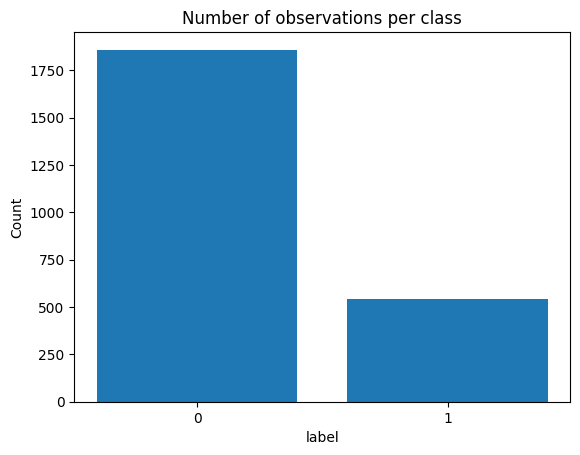

Example of Environmental Claim:
The goal to reduce relative GHG emissions by 20% by 2020 was achieved in 2013.

Exemple of Non Environmental Claim:
As part of this program we are expecting to increase the seat density on our Airbus A320 fleet.


In [5]:
# Information on the training dataset
print("Information on the training dataset:")
print(f"{'-' * 45}")
print('')

# display the number of observations
num_observations = len(df_train)
print(f"There are {num_observations} observations in the training dataset.")
print('')
print('')


# display the number of observations per class
num_0 = (df_train['label'] == 0).sum()
num_1 = (df_train['label'] == 1).sum()
ratio = (num_1/num_0)*100
print(f"There are {num_0} observations that are not related to the environment (label = 0)")
print(f"There are {num_1} observations that are environmental claims (label = 1).")
print(f"The ratio is {ratio:.2f}%.")

#plot 
column_name = 'label'
value_counts = df_train[column_name].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title(f'Number of observations per class')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# Diclose exemples of claims  
label_1_indexes = df_train[df_train['label'] == 1].index
label_1_observation = df_train.loc[label_1_indexes[0], 'text']
print(f"Example of Environmental Claim:\n{label_1_observation}")
print('')
label_0_indexes = df_train[df_train['label'] == 0].index
label_0_observation = df_train.loc[label_0_indexes[123], 'text']
print(f"Exemple of Non Environmental Claim:\n{label_0_observation}")

Information on the testing dataset:
---------------------------------------------

There are 300 observations in the testing dataset.


There are 236 observations that are not related to the environment (label = 0)
There are 64 observations that are environmental claims (label = 1).
The ratio is 27.12%.


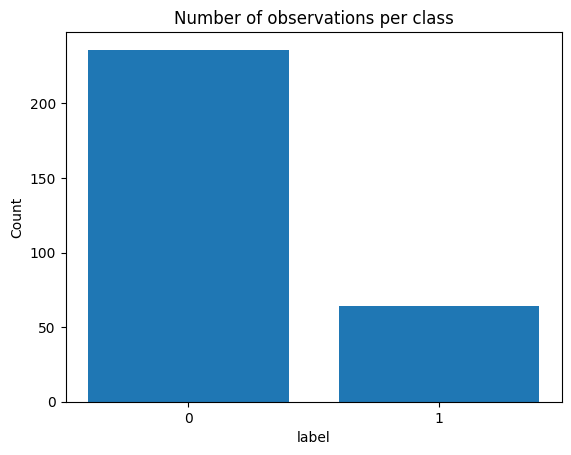

Exemple of Environmental Claim:
All operations at Panasonic Eco Technology Center are now powered by electricity derived from 100% renewable energy.

Exemple of Non Environmental Claim:
So cohorts like young moms and young dads and broader audiences, that's been very important.


In [6]:
# Information on the testing dataset
print("Information on the testing dataset:")
print(f"{'-' * 45}")
print('')

# display the number of observations
num_observations = len(df_test)
print(f"There are {num_observations} observations in the testing dataset.")
print('')
print('')

# display the number of observations per class
num_0 = (df_test['label'] == 0).sum()
num_1 = (df_test['label'] == 1).sum()
ratio = (num_1/num_0)*100
print(f"There are {num_0} observations that are not related to the environment (label = 0)")
print(f"There are {num_1} observations that are environmental claims (label = 1).")
print(f"The ratio is {ratio:.2f}%.")

#plot 
column_name = 'label'
value_counts = df_test[column_name].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title(f'Number of observations per class')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# Diclose exemples of claims  
label_1_indexes = df_test[df_test['label'] == 1].index
label_1_observation = df_test.loc[label_1_indexes[0], 'text']
print(f"Exemple of Environmental Claim:\n{label_1_observation}")
print('')
label_0_indexes = df_test[df_test['label'] == 0].index
label_0_observation = df_test.loc[label_0_indexes[123], 'text']
print(f"Exemple of Non Environmental Claim:\n{label_0_observation}")



**<span style="color:green"> Warning!! It is not because a claim is labelled 0, that the sentence does not talk about the environment! See example below</span>**

In [7]:
# access the row with index 15
observation = df_train.loc[15]
print(f"Label: {observation['label']}")
print(observation['text'])

Label: 0
Overview ESG Framework and Oversight Across Scope 1, 2 and 3, emissions per square metre fell 14.1 per cent to 100.51 kg CO2e/m2.


# EDA

Let us take a closer look at the training set. 

## Explore words within claims

In [8]:
# Receive more information on the words within the claim

# Total number of words per claim in the training set
observations = len(df_train)
words_number = df_train["text"].apply(lambda x: len(x)).sum()
print("In total there are:", words_number, "words within the training dataset containing", observations,"claims.")

# Number of words per claim
df_train["word_count"] = df_train["text"].apply(lambda x: len(x.split()))
df_train["word_count"].describe()

In total there are: 364767 words within the training dataset containing 2400 claims.


count    2400.00000
mean       24.44125
std         7.54516
min        11.00000
25%        18.00000
50%        24.00000
75%        30.00000
max        39.00000
Name: word_count, dtype: float64

,Frequency
Word,
the,2796
and,1975
to,1969
of,1770
in,1320
a,895
our,843
we,696
that,635


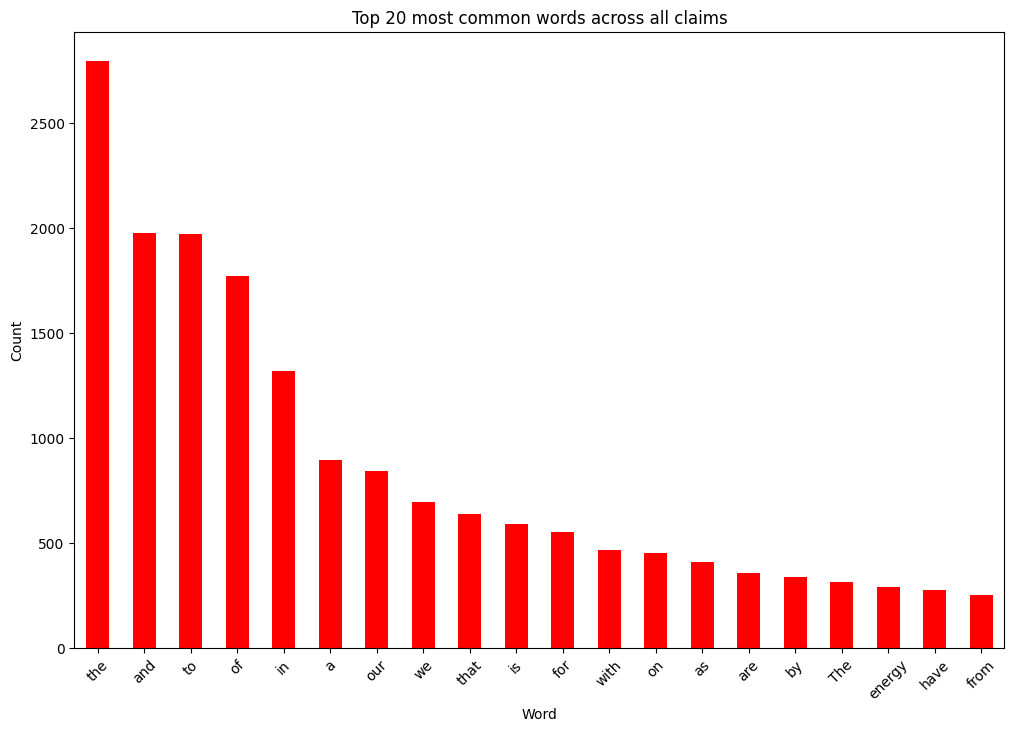

In [9]:
# Combine all claims' text into a single string
all_text = ' '.join(df_train['text'].tolist())

# Tokenize the text by splitting on whitespace
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get n most frequent words
n = 20  # Specify the number of most frequent words I want to retrieve
most_frequent_words = word_counts.most_common(n)

# create a list of most frequent words
most_common = [{"Word": word, "Frequency": frequency} for word, frequency in most_frequent_words]
word_common = pd.DataFrame(most_common)
word_common.set_index("Word",inplace=True)
display(word_common)

#visualize the 10 most common words in a bar chart 
plt.figure(figsize=(12,8))
word_common["Frequency"].plot(kind="bar",color="red")
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Top 20 most common words across all claims")
plt.xticks(rotation=45)
plt.show()

## Sentence content - company name

In [10]:
entities = []
companies = []

for text in df_train["text"]:
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Change accented characters like é -> e
    text = unidecode.unidecode(text)
    doc = sp(text)
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    ent = [ent.text for ent in doc.ents if ent.label_]
    # Remove duplicates and empty strings
    orgs = list(set([org.strip() for org in orgs if org.strip()]))
    ent = list(set([e.strip() for e in ent if e.strip()]))
    companies.append(orgs)
    entities.append(ent)

# Add companies and entities as new columns to the DataFrame
df_train["companies"] = companies
df_train["entities"] = entities

display(df_train)

,text,label,word_count,companies,entities
0,It will enable E.ON to acquire and leverage a ...,0,34,[EON],[EON]
1,And that's honestly most markets in the U.S. S...,0,37,[],"[70, US]"
2,A key pillar of our strategy is to continue to...,0,39,[],[]
3,The goal to reduce relative GHG emissions by 2...,1,15,[GHG],"[2020, GHG, 2013, 20]"
4,"As you know, we drove about $75 million of cos...",0,17,[],"[fiscal year 18, about 75 million, last year]"
...,...,...,...,...,...
2395,The collaboration will enable Nestlé to delive...,1,26,[Nestle],[Nestle]
2396,Through the MOBILITY THAT ADAPTS TO MEET NEEDS...,0,35,"[Renault, Renault Tech]","[European, Renault, 2009, Renault Tech]"
2397,While we are making progress towards our near ...,0,25,[],[]
2398,"On 5 December 2019, the Federal Network Agency...",0,27,[the Federal Network Agency],"[the Federal Network Agency, 5 December 2019, ..."


In [11]:
#taking a closer look at the claims different entities
first_10_lines = df_train["text"].head(10)
text_10 = first_10_lines.to_list()
docs = [sp(text) for text in text_10]

for i, doc in enumerate(docs):
    text_10_num = (f"Claim {i+1}:")
    print(text_10_num) 
    displacy.render(doc,style="ent",jupyter=True)

Claim 1:


c:\Users\Charlotte Ahrens\anaconda3\lib\site-packages\spacy\displacy\__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Claim 2:


Claim 3:


Claim 4:


Claim 5:


Claim 6:


Claim 7:


Claim 8:


Claim 9:


Claim 10:


Company: ['MW'], Count: 14
Company: ['LNG'], Count: 11
Company: ['Bank'], Count: 6
Company: ['EDF'], Count: 5
Company: ['UN'], Count: 4
Company: ['ESG'], Count: 4
Company: ['Airbus'], Count: 4
Company: ['RD'], Count: 3
Company: ['Climate'], Count: 3
Company: ['ROIC'], Count: 3
Company: ['Tokio Marine Group'], Count: 3
Company: ['BBVA'], Count: 3
Company: ['AXA'], Count: 3
Company: ['TCFD'], Count: 3
Company: ['NGL'], Count: 2
Company: ['Nordea'], Count: 2
Company: ['FENC'], Count: 2
Company: ['Energy'], Count: 2
Company: ['Companys'], Count: 2
Company: ['the Paris Agreement'], Count: 2
Company: ['NTPC'], Count: 2
Company: ['VOC'], Count: 2
Company: ['Hydro'], Count: 2
Company: ['KLP'], Count: 2
Company: ['Groups'], Count: 2
Company: ['VERBUND'], Count: 2
Company: ['NYSPSC'], Count: 2
Company: ['CH4'], Count: 2
Company: ['FPSO'], Count: 2
Company: ['Alliance'], Count: 2
Company: ['EV'], Count: 2
Company: ['MTN'], Count: 2
Company: ['the Task Force'], Count: 2
Company: ['EU'], Count: 2
C

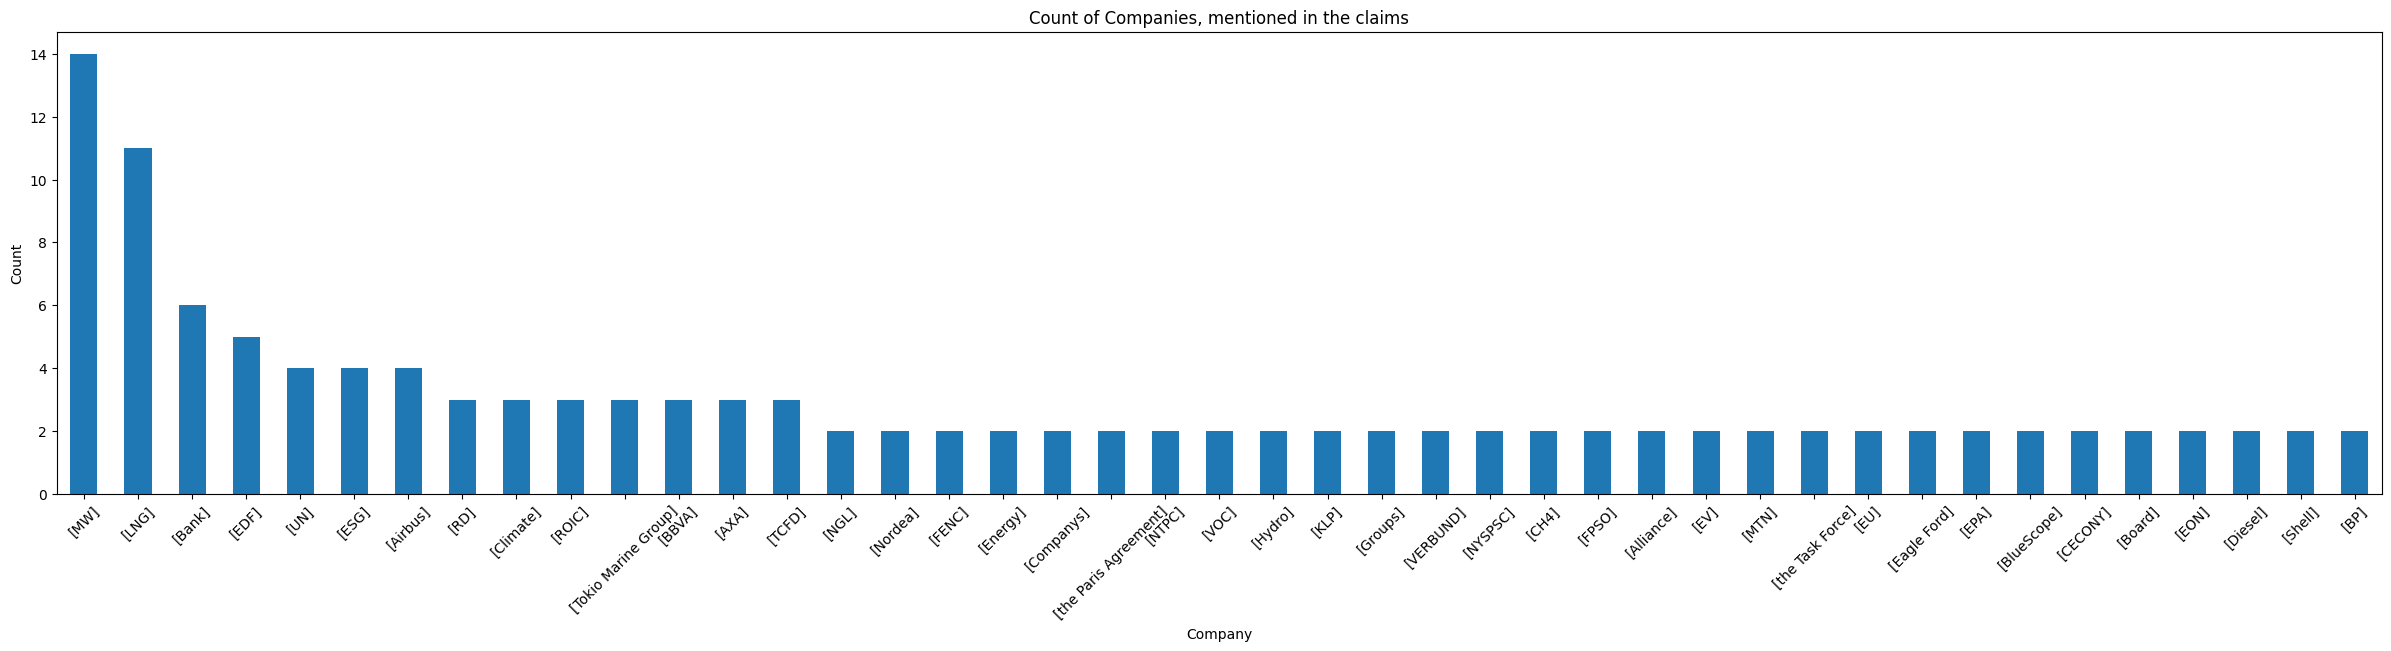

In [12]:
#looking for multiples in terms of the company name, including all type of claims
company_counts = df_train["companies"].value_counts()
multiple_times = company_counts[(company_counts > 1) & (company_counts < 16)] #restrict to < 16 to exclude nan's and other entities that were titled as companies, but are other acronyms like GHG
for company, count in multiple_times.items():
    print(f"Company: {company}, Count: {count}")

#displaying the count of companies visually 
plt.figure(figsize=(30,6))
multiple_times.plot(kind="bar")
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Count of Companies, mentioned in the claims")
plt.xticks(rotation=45)
plt.show()

#I Was thinking to add hue -> depending on if the label of the countries are 0 or 1 -> differentiate it by color, but I didn't figure it out how to program it 

In [13]:
#exploring row that talk about a specific company for example Airbus
company_name = "Airbus"
company_Airbus = df_train[df_train["companies"].apply(lambda x: company_name in x)]
display(company_Airbus)

#df_train[df_train["companies"].str.contains("Airbus")]

,text,label,word_count,companies,entities
162,As part of this program we are expecting to in...,0,18,[Airbus],"[Airbus, A320]"
904,"In conjunction with the new order, we also res...",0,31,[Airbus],"[25, Airbus]"
1785,This enables Airbus to measure its environment...,0,22,[Airbus],[Airbus]
1886,In connection with our plans to launch flights...,0,34,[Airbus],"[2021, London, April 2019, Airbus, 13, A321 Lo..."


,text,label,word_count,companies,entities
3,The goal to reduce relative GHG emissions by 2...,1,15,[GHG],"[2020, GHG, 2013, 20]"
5,1.2 Significant Changes to Assets In February ...,1,38,"[MW, the Powering Australian Renewables Fund P...","[the Powering Australian Renewables Fund PARF,..."
7,This not only provides a clean energy solution...,1,23,[],[]
9,The Group has therefore built its sustainabili...,1,35,[Group],"[Group, four]"
14,Waste As part of our ambitions to move toward ...,1,23,[],[]


Company: [], Count: 305
Company: ['Group'], Count: 11
Company: ['Company'], Count: 9
Company: ['GHG'], Count: 6
Company: ['Bank'], Count: 5
Company: ['ESG'], Count: 3
Company: ['EDF'], Count: 3
Company: ['UN'], Count: 3
Company: ['VERBUND'], Count: 2
Company: ['Tokio Marine Group'], Count: 2
Company: ['Alliance'], Count: 2


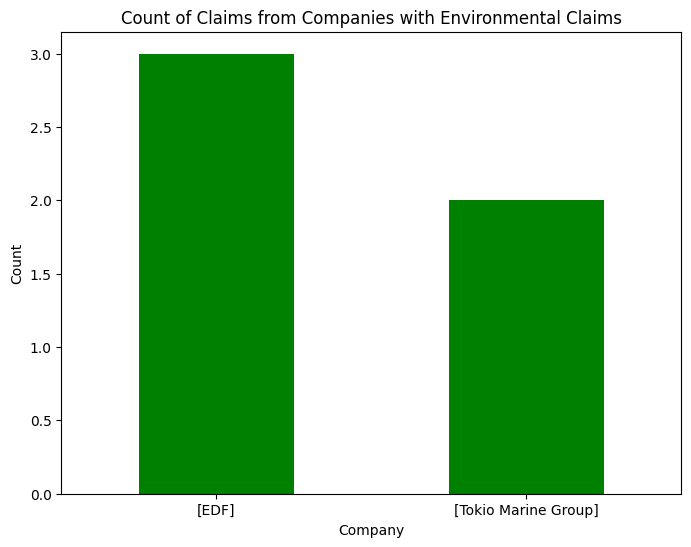

In [14]:
#the above shows that all Airbus claims where labelled as non-environmental claims. To get a better idea of companies that used such statements we focus on environmental claims only.
df_train_env= df_train[df_train["label"] ==1]
display(df_train_env.head())

#looking for multiples in terms of the company name
company_counts = df_train_env["companies"].value_counts()
multiple_times_env = company_counts[company_counts >1]

#displaying companies that have green claims
for company, count in multiple_times_env.items():
    print(f"Company: {company}, Count: {count}")
# -> we see that most filtered "companies" are not actual companies .> filter accordingly

#visually presenting the count of companies that are labelled with environmental claims  
# Filter the specific companies
selected_companies = [["EDF"], ["Tokio Marine Group"]]
filtered_counts = multiple_times_env[multiple_times_env.index.isin(selected_companies)]

# Plot the counts of selected companies
plt.figure(figsize=(8, 6))
filtered_counts.plot(kind="bar",color="green")
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Count of Claims from Companies with Environmental Claims")
plt.xticks(rotation=0)
plt.show()

In [15]:
#check statements with multiple company counts including green and non green claims // eg: EDF = British integrated energy company, French state-owned by EDF (Électricité de France)
pd.set_option('display.max_colwidth', None)# setting wide column to display whole text
company_name = "EDF"
company_EDF = df_train[df_train["companies"].apply(lambda x: company_name in x)]
display(company_EDF[["text","label"]])

pd.reset_option('display.max_colwidth') # resetting the column size to normal

,text,label
242,"The hydropower facilities have positive effects on both economic development and the environment, and EDF applies a proactive management policy in relation to water resources, in liaison with various water stakeholders.",1
632,"Within the EpE (3), EDF also contributed to a global study on the carbon neutrality of France in 2050.",1
738,All EDF group business lines are working to cut the carbon impact of the refrigerating fluids they use.,1
753,"In March 2020, EDF committed with ARVAL to facilitating access to electric mobility for both business and residential customers, based on IZI by EDF.",0
949,"In January 2021, the EDF group ranked first in the list of the most credible companies in terms of communication, in the utilities/energy category (1).",0
1012,"As part of the ""Coup de Pouce Chauffage"" (3) scheme, EDF launched in January 2019 its ""Mon chauffage durable"" offer, to finance replacing ageing heating systems by more efficient ones.",0
1534,"Consequently, the Group has an “energy markets” risk policy for all energy commodities, applicable to EDF and entities over which it has operational control.",0
1556,"In terms of new business lines, EDF is aiming to have a portfolio of 1 million off-grid kits by 2030 and is pursuing the development of new markets such as microgrids, smart grids, storage, hydrogen, mobility, smart cities, etc.,",0


There are several statements from some companies, while some are labelled as environmental claims others were not. 

# Sentence content - year   

In [16]:
#check statements based on year-> did the count increase? This is difficult to show since the 
year = []
for text in df_train_env["text"]:
    #remove punctuation
    text = text.translate(str.maketrans("","", string.punctuation))
    #change accented characters like é -> e
    text = unidecode.unidecode(text)
    doc = sp(text)
    years = [ent.text for ent in doc.ents if ent.label_ == "DATE"]
    #remove duplicates and empty strings
    years = list(set([year.strip() for year in years if year.strip()]))
    year.append(years)
    
df_train_env.copy()
df_train_env["year"] = year
df_train_env
year_counts = df_train_env["year"].value_counts()
print(year_counts.index.sort_values(ascending=True))

Index([                                         [],
                                ['1 January 2016'],
                                       ['10 year'],
                              ['11 years', '1978'],
                                         ['16128'],
                               ['1992', 'year 12'],
                                 ['20 yearonyear'],
                                          ['2004'],
                              ['2005', 'annually'],
                                          ['2007'],
                       ['2007', '2007-12', '2009'],
                                          ['2009'],
                                          ['2010'],
                                          ['2013'],
                                        ['201314'],
                                          ['2014'],
                 ['2014', '2016', 'our base year'],
                                      ['20142020'],
                                          ['2015'],
            

C:\Users\Charlotte Ahrens\AppData\Local\Temp\ipykernel_19292\857368648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_env["year"] = year


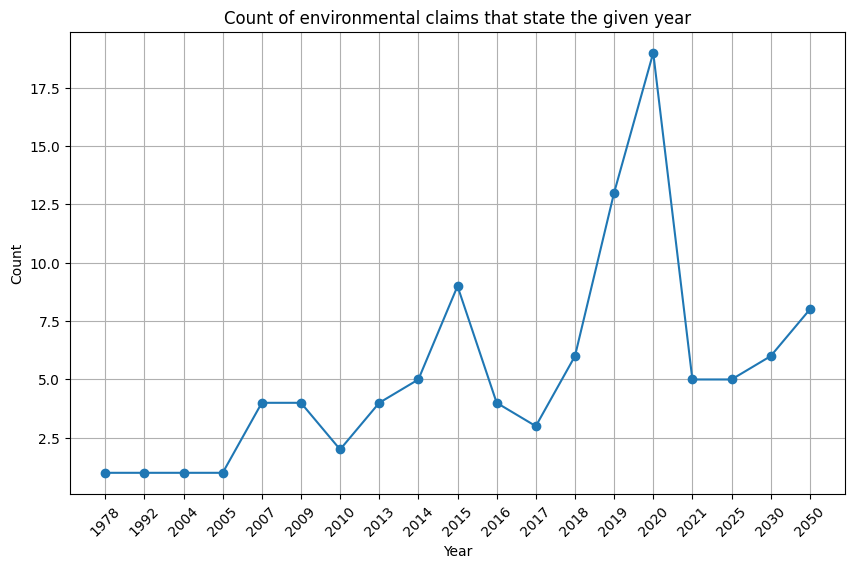

In [17]:
import re

year_indexes = df_train_env["year"].dropna().index

# Extracting years starting from 1900and removing months and days
years = [re.findall(r"\b(?:19|20|21)\d{2}\b", str(year)) for year in df_train_env.loc[year_indexes, "year"]]
filtered_years = [year[0] if year else "" for year in years]  # Keep the first year only as otherwise we cannot interpret the year

# Assigning the filtered years back to the DataFrame
df_train_env.loc[year_indexes, "year"] = filtered_years
filtered_years

# Counting the occurrences of each year
year_counts = pd.Series(filtered_years).value_counts().sort_index()

# Filtering years starting from 1900
filtered_year_counts = year_counts[year_counts.index >= "1900"]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_year_counts.index, filtered_year_counts.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count of environmental claims that state the given year")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



**The key takeaways of the Exploratory Data Analysis (EDA) are the following:**
- the training and test set is quite unbalanced in terms of labelled=0 and labelled=1 data.
- unlabelled data, meaning not categorized as an environmental claim doesn't mean it doesn't talk about environmental topics. 
- The most common words within the training set are as expected articles like ("the", "a"), prepositions ("to","of","in"), and various forms of the verbs ("to be"," to have"). It will be important to give those words less importance for example through the TF-IDF model. The most important word that gives a hint about the context is "energy", on rank 18th with a count of 290 words across all claims.

- When selecting the claims that are coming from a specific company, we have four main observations:

    1. within the 2400 claims the sample shows multiple claims from one company.
    2. The company is not determining if a claim is labels as environmental or not since we find both labels within claims of the same company.
    3. We only have the company's name for a minority of the claims. 
    4. Considering only environmental claims, we have multiple claims and the company name information only for EDF, an Energy firm in the UK, as well as for Tokio Marine Group, a multinational insurance holding company, based in Tokyo, Japan.
- When selecting the claims that are specifying a given year, the main observations are: 
    1. 2015, 2019 and 2020 show a relative peak in environmental claims. 2015 is likely to be due to teh year of the Paris Agreement, meaning several claims where either made in that time or refer to that year within their statement. In terms of the rise in the year 2019 and 2020, it is likely to be mentioned more often due to the time period when the dataset was fed with claims.
    2. Years that lay in the future are likely to come from claims that state information about future targets.
    3. Due to the high amount of missing years for environmental claims, the line graph gives just an idea of behavior, but no concrete information.